Calling FFC just-in-time (JIT) compiler, this may take some time.
error_L2  = 0.008235098073358146
error_max = 2.4868995751603507e-14


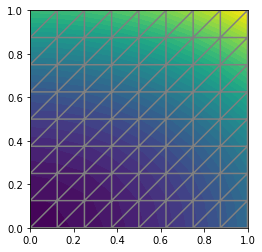

In [3]:
"""
FEniCS tutorial demo program: Poisson equation with Dirichlet conditions.
Test problem is chosen to give an exact solution at all nodes of the mesh.

  -Laplace(u) = f    in the unit square
            u = u_D  on the boundary

  u_D = 1 + x^2 + 2y^2
    f = -6
"""

from __future__ import print_function
from fenics import *

# Create mesh and define function space
mesh = UnitSquareMesh(8, 8)
V = FunctionSpace(mesh, 'P', 1)

# Dirichlet条件的精确函数
u_D = Expression('1 + x[0]*x[0] + 2*x[1]*x[1]', degree=2)

tol = 1E-14
def boundary_D(x, on_boundary):
    if on_boundary:
        if near(x[0],0,tol) or near(x[0],1,tol): #0,1为x[0]的边界
            return True
        else:
            return False
    else:
        return False
g = Expression('-4*x[1]',degree=1)
bc = DirichletBC(V, u_D, boundary_D)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(-6.0)
a = dot(grad(u), grad(v))*dx
L = f*v*dx-g*v*ds

# Compute solution
u = Function(V)
solve(a == L, u, bc)

# Plot solution and mesh
plot(u)
plot(mesh)

# Save solution to file in VTK format
vtkfile = File('poisson/solution.pvd')
vtkfile << u

# Compute error in L2 norm
error_L2 = errornorm(u_D, u, 'L2')

# Compute maximum error at vertices
vertex_values_u_D = u_D.compute_vertex_values(mesh)
vertex_values_u = u.compute_vertex_values(mesh)
import numpy as np
error_max = np.max(np.abs(vertex_values_u_D - vertex_values_u))

# Print errors
print('error_L2  =', error_L2)
print('error_max =', error_max)


In [19]:
print(0.1 + 0.2 == 0.3)
0.1 + 0.2

False


0.30000000000000004